### PSU DS 200  Fall 2019

#### Project Utility Jupyter Notebook 1
This Jupyter Notebook is intended to be used to construct Project Deliverables for the Mini-project
of DS 200. 
#### Acknowledgement: The datascience module is developed by University of California Berkeley for its data 8 course.


In [1]:
!pip install datascience

     |████████████████████████████████| 51kB 2.0MB/s eta 0:00:011
     |████████████████████████████████| 92kB 5.2MB/s eta 0:00:01
     |████████████████████████████████| 13.0MB 28kB/s  eta 0:00:01    |███▊                            | 1.5MB 8.4MB/s eta 0:00:02     |██████                          | 2.4MB 8.4MB/s eta 0:00:02     |███████████▊                    | 4.8MB 8.4MB/s eta 0:00:01��██████████████████████████▌ | 12.4MB 5.1MB/s eta 0:00:01|███████████████████████████████▎| 12.7MB 5.1MB/s eta 0:00:01
     |████████████████████████████████| 215kB 7.2MB/s eta 0:00:01
     |████████████████████████████████| 133kB 7.8MB/s eta 0:00:01
     |████████████████████████████████| 92kB 5.3MB/s  eta 0:00:01
  Created wheel for datascience: filename=datascience-0.15.3-cp35-none-any.whl size=44582 sha256=f66fade50dea75a68ec57fc950ba5c4cc27182af284b4ef8f26c43efb15e5f58
  Stored in directory: /home/nbuser/.cache/pip/wheels/b8/37/0a/80274866028f6485c5957f0e1acf8e2b755fbe9dd0fd4ad275
  Created wheel

  Found existing installation: Jinja2 2.8
    Uninstalling Jinja2-2.8:
      Successfully uninstalled Jinja2-2.8
  Found existing installation: matplotlib 2.1.1
    Uninstalling matplotlib-2.1.1:
      Successfully uninstalled matplotlib-2.1.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import numpy as np

from sklearn.externals import joblib

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
t1 = Table.read_table("Tagged-Tweets.csv", sep =',')
t1.show(10)

Support,text
1,**everyone screaming that were gonna die in 12 years bec ...
0,@colin_ban88 @starryplough67 @doc53384809 I said I took ...
1,@Darryl0007 @KTHopkins Hard man but you won't think it b ...
1,@eilperin @Fahrenthold @afreedma @jdawsey1 I hope the ot ...
1,@EliasCrimLaw @olcarcajou @FairQuestions @eliasmunshya @ ...
0,@Fahrenthold And Mulvaney said that climate change will ...
0,@FormerSenior @QandA @SBSNews Maybe stop lying. Climate ...
0,@GrantMcroberts Basically people who want us to do somet ...
0,@horsetoilets @LouiseStephen9 @drandyphung But the clima ...
1,@JGunlock @steph93065 Take them very seriously. 48 perce ...


### The code below extract the "class label" from the CSV file to find out the total number of positive/supportive vs negative/non-supportive tweets in the labelled data set.
### If you use Climage Change tweets, the column label for the class label is 'Support'.
### If you use Airline Sentiment tweets, the column label for the class label is 'airline_sentiment' (as shown in Lab9)

In [4]:
t1_positive = t1.where('Support', are.equal_to(1))
t1_negative = t1.where('Support', are.equal_to(0))
t1_positive

Support,text
1,**everyone screaming that were gonna die in 12 years bec ...
1,@Darryl0007 @KTHopkins Hard man but you won't think it b ...
1,@eilperin @Fahrenthold @afreedma @jdawsey1 I hope the ot ...
1,@EliasCrimLaw @olcarcajou @FairQuestions @eliasmunshya @ ...
1,@JGunlock @steph93065 Take them very seriously. 48 perce ...
1,@RichLowry @RichLowry you are obviously not very smart. ...
1,@ukmav @hilltopgina @elliethebookgal Yet he contributes ...
1,| Tell Congress: Take Action to Against Climate Change h ...
1,A new U.N. report predicts more powerful storms increase ...
1,Antarctica latest: Scientists to drill THREE KILOMETRES ...


In [5]:
t1_negative

Support,text
0,@colin_ban88 @starryplough67 @doc53384809 I said I took ...
0,@Fahrenthold And Mulvaney said that climate change will ...
0,@FormerSenior @QandA @SBSNews Maybe stop lying. Climate ...
0,@GrantMcroberts Basically people who want us to do somet ...
0,@horsetoilets @LouiseStephen9 @drandyphung But the clima ...
0,@kentlivenews Bet @GretaThunberg will be pissed that cli ...
0,@KTHopkins @DoringHaak These climate change freaks dont ...
0,@MarkYoungTruth I feel like this kid is a climate change ...
0,@postpolitics Why should I believe a young girl with asp ...
0,@TheOfficerTatum @Just_Fargo Can anyone PLEASE show me a ...


In [6]:
data = t1_positive.append(t1_negative)

In [7]:
data

Support,text
1,**everyone screaming that were gonna die in 12 years bec ...
1,@Darryl0007 @KTHopkins Hard man but you won't think it b ...
1,@eilperin @Fahrenthold @afreedma @jdawsey1 I hope the ot ...
1,@EliasCrimLaw @olcarcajou @FairQuestions @eliasmunshya @ ...
1,@JGunlock @steph93065 Take them very seriously. 48 perce ...
1,@RichLowry @RichLowry you are obviously not very smart. ...
1,@ukmav @hilltopgina @elliethebookgal Yet he contributes ...
1,| Tell Congress: Take Action to Against Climate Change h ...
1,A new U.N. report predicts more powerful storms increase ...
1,Antarctica latest: Scientists to drill THREE KILOMETRES ...


In [9]:
# Use the data for constructing a Decision Tree Stance Classifier
data_tagged_X= list(data['text'])
data_tagged_Y= list(data['Support'])

print('tagged data input size', len(data_tagged_X))
print('tagged data target prediction size', len(data_tagged_Y))

tagged data input size 344
tagged data target prediction size 344


### Stratified KFold Cross Validation
StratifiedKFold is a function in sklearn under the submodule model_selection.
#### Notice: In the beginning of this notebook, we import StratifiedKFold using the following python code:
    from sklearn.model_selection import StratifiedKFold
    
The n_splits parameter of StratifiedKFold indicates how many folds to use.  For example, 
n_splits=5 means Stratified 5-fold cross validation.


In [70]:
# Use Stratified Kfold Cross Validation so that
#   each fold contains the same ratio of positive/negative instances
k = 8
skf = StratifiedKFold(n_splits= k , random_state=1, shuffle= True)

In [71]:
### Set the range of max_depth for finding the best max_depth for this problem
low_max_depth = 1
high_max_depth = 40
training_performance_table = np.empty( [high_max_depth+1, 10, 5] )
testing_performance_table = np.empty( [high_max_depth+1, 10, 5] )

In [72]:
for depth in range(low_max_depth, high_max_depth+1):

    fold = 1

    for train_index, test_index in skf.split(data_tagged_X, data_tagged_Y):
        print("Fold Number:", fold)
     #   print("Training Data Index:", train_index)
        print("Testing Data Index:", test_index)  
    
        x_train= list(data.take(train_index)['text'])     
    #    print("Training Data:", x_train)
        y_train= list(data.take(train_index)['Support'])
    #    print("Training Data Target Output:", y_train)
        x_test= list(data.take(test_index)['text'])
    #    print("Testing Data:", x_test)
        y_test= list(data.take(test_index)['Support'])
        print("Testing Data Target Output:", y_test)
    
        count_vect = CountVectorizer(token_pattern='((?:([@#]|[0-9]|[a-z]|[A-Z])+))', analyzer= 'word', min_df=2)
        X_word_vect = count_vect.fit_transform(x_train)
    
        clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=depth, \
                                  min_samples_leaf =2)
    
        clf.fit(X_word_vect, y_train)
    
        ### Use the model generated to predict for training data
        predicted_training_y = clf.predict(X_word_vect)
    
        train_p = metrics.precision_score(y_train, predicted_training_y)
        train_r = metrics.recall_score(y_train, predicted_training_y)
        train_f1= metrics.f1_score(y_train, predicted_training_y)
        training_performance_table[depth, fold, 0]=depth
        training_performance_table[depth, fold, 1]=train_p
        training_performance_table[depth, fold, 2]=train_r
        training_performance_table[depth, fold, 3]=train_f1
        print("Max depth is ", depth, "Prediction Performance for Training Data f1:", train_f1)

        ### Use the model generated to predict for testint data
        x_test_word_vect = count_vect.transform(x_test)
        predicted_testing_y = clf.predict(x_test_word_vect)
    
        test_p= metrics.precision_score(y_test, predicted_testing_y)
        test_r= metrics.recall_score(y_test, predicted_testing_y)
        test_f1 = metrics.f1_score(y_test, predicted_testing_y)
        testing_performance_table[depth, fold, 0]=depth
        testing_performance_table[depth, fold, 1]=test_p
        testing_performance_table[depth, fold, 2]= test_r
        testing_performance_table[depth, fold, 3]= test_f1
        print("Prediction Performance for Testing Data f1:", test_f1)
    
        fold=fold+1
    


Fold Number: 1
Testing Data Index: [  4  11  18  31  33  34  35  38  40  44  47  51  58  59  67  89  95 107
 150 155 167 168 174 177 188 204 205 215 227 243 246 252 254 263 266 269
 275 279 299 303 318 324 328 329]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  1 Prediction Performance for Training Data f1: 0.7577639751552795
Prediction Performance for Testing Data f1: 0.7605633802816901
Fold Number: 2
Testing Data Index: [ 16  27  28  29  62  73  84  88  94  99 102 105 106 110 112 122 123 127
 145 151 153 158 185 190 193 200 209 214 226 241 245 250 255 258 265 272
 288 302 314 327 332 334 336 341]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  1 Prediction Performance for Training Data f1: 0.7577639751552795
Prediction Performance fo

Prediction Performance for Testing Data f1: 0.7536231884057971
Fold Number: 3
Testing Data Index: [  5  14  17  19  39  42  48  53  55  56  69  78  90  98 116 117 147 154
 166 169 171 180 181 194 198 208 212 216 222 249 256 264 268 276 292 293
 295 305 309 310 321 330 335]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  3 Prediction Performance for Training Data f1: 0.7850877192982456
Prediction Performance for Testing Data f1: 0.7272727272727274
Fold Number: 4
Testing Data Index: [ 12  13  45  54  66  81  82  93  97 103 108 114 119 130 132 138 143 148
 163 173 175 183 186 187 189 202 220 229 233 237 242 244 248 261 283 285
 287 301 307 308 320 322 343]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  3 Prediction Performance for Training Data

Max depth is  5 Prediction Performance for Training Data f1: 0.7886710239651417
Prediction Performance for Testing Data f1: 0.7301587301587302
Fold Number: 6
Testing Data Index: [  9  10  15  23  32  41  64  74  83  87  92 100 104 109 111 125 126 135
 136 152 160 165 172 179 197 201 210 211 213 218 231 240 257 259 270 280
 291 298 300 312 319 340 342]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  5 Prediction Performance for Training Data f1: 0.8167053364269141
Prediction Performance for Testing Data f1: 0.6666666666666667
Fold Number: 7
Testing Data Index: [  1   3   7   8  22  24  26  30  43  49  52  57  60  61  63  76  80 115
 121 128 131 149 184 196 199 206 217 219 223 232 267 271 273 278 296 297
 304 306 315 323 325 337]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Prediction Performance for Testing Data f1: 0.6440677966101696
Fold Number: 7
Testing Data Index: [  1   3   7   8  22  24  26  30  43  49  52  57  60  61  63  76  80 115
 121 128 131 149 184 196 199 206 217 219 223 232 267 271 273 278 296 297
 304 306 315 323 325 337]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  7 Prediction Performance for Training Data f1: 0.69375
Prediction Performance for Testing Data f1: 0.5116279069767442
Fold Number: 8
Testing Data Index: [ 20  25  37  50  68  71  72  79  86  96 101 129 133 134 137 139 140 141
 142 144 146 156 157 178 192 203 221 224 228 230 235 238 239 247 260 281
 282 289 294 311 316 339]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  7 Prediction Performance for Training Data f1: 0.7973856209150326
P

Max depth is  9 Prediction Performance for Training Data f1: 0.7990762124711315
Prediction Performance for Testing Data f1: 0.7241379310344829
Fold Number: 1
Testing Data Index: [  4  11  18  31  33  34  35  38  40  44  47  51  58  59  67  89  95 107
 150 155 167 168 174 177 188 204 205 215 227 243 246 252 254 263 266 269
 275 279 299 303 318 324 328 329]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  10 Prediction Performance for Training Data f1: 0.8221709006928406
Prediction Performance for Testing Data f1: 0.7692307692307692
Fold Number: 2
Testing Data Index: [ 16  27  28  29  62  73  84  88  94  99 102 105 106 110 112 122 123 127
 145 151 153 158 185 190 193 200 209 214 226 241 245 250 255 258 265 272
 288 302 314 327 332 334 336 341]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 

Max depth is  12 Prediction Performance for Training Data f1: 0.8333333333333334
Prediction Performance for Testing Data f1: 0.7419354838709677
Fold Number: 2
Testing Data Index: [ 16  27  28  29  62  73  84  88  94  99 102 105 106 110 112 122 123 127
 145 151 153 158 185 190 193 200 209 214 226 241 245 250 255 258 265 272
 288 302 314 327 332 334 336 341]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  12 Prediction Performance for Training Data f1: 0.8144796380090498
Prediction Performance for Testing Data f1: 0.6875
Fold Number: 3
Testing Data Index: [  5  14  17  19  39  42  48  53  55  56  69  78  90  98 116 117 147 154
 166 169 171 180 181 194 198 208 212 216 222 249 256 264 268 276 292 293
 295 305 309 310 321 330 335]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Max depth is  14 Prediction Performance for Training Data f1: 0.8888888888888888
Prediction Performance for Testing Data f1: 0.7142857142857142
Fold Number: 5
Testing Data Index: [  0   2   6  21  36  46  65  70  75  77  85  91 113 118 120 124 159 161
 162 164 170 176 182 191 195 207 225 234 236 251 253 262 274 277 284 286
 290 313 317 326 331 333 338]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  14 Prediction Performance for Training Data f1: 0.8421052631578948
Prediction Performance for Testing Data f1: 0.7368421052631579
Fold Number: 6
Testing Data Index: [  9  10  15  23  32  41  64  74  83  87  92 100 104 109 111 125 126 135
 136 152 160 165 172 179 197 201 210 211 213 218 231 240 257 259 270 280
 291 298 300 312 319 340 342]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

Max depth is  16 Prediction Performance for Training Data f1: 0.8753056234718827
Prediction Performance for Testing Data f1: 0.6896551724137931
Fold Number: 1
Testing Data Index: [  4  11  18  31  33  34  35  38  40  44  47  51  58  59  67  89  95 107
 150 155 167 168 174 177 188 204 205 215 227 243 246 252 254 263 266 269
 275 279 299 303 318 324 328 329]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  17 Prediction Performance for Training Data f1: 0.8571428571428572
Prediction Performance for Testing Data f1: 0.7213114754098361
Fold Number: 2
Testing Data Index: [ 16  27  28  29  62  73  84  88  94  99 102 105 106 110 112 122 123 127
 145 151 153 158 185 190 193 200 209 214 226 241 245 250 255 258 265 272
 288 302 314 327 332 334 336 341]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

Max depth is  19 Prediction Performance for Training Data f1: 0.8682926829268293
Prediction Performance for Testing Data f1: 0.7118644067796609
Fold Number: 4
Testing Data Index: [ 12  13  45  54  66  81  82  93  97 103 108 114 119 130 132 138 143 148
 163 173 175 183 186 187 189 202 220 229 233 237 242 244 248 261 283 285
 287 301 307 308 320 322 343]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  19 Prediction Performance for Training Data f1: 0.9242819843342036
Prediction Performance for Testing Data f1: 0.7017543859649122
Fold Number: 5
Testing Data Index: [  0   2   6  21  36  46  65  70  75  77  85  91 113 118 120 124 159 161
 162 164 170 176 182 191 195 207 225 234 236 251 253 262 274 277 284 286
 290 313 317 326 331 333 338]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

Max depth is  21 Prediction Performance for Training Data f1: 0.8827930174563592
Prediction Performance for Testing Data f1: 0.6909090909090909
Fold Number: 6
Testing Data Index: [  9  10  15  23  32  41  64  74  83  87  92 100 104 109 111 125 126 135
 136 152 160 165 172 179 197 201 210 211 213 218 231 240 257 259 270 280
 291 298 300 312 319 340 342]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  21 Prediction Performance for Training Data f1: 0.9206349206349207
Prediction Performance for Testing Data f1: 0.5818181818181819
Fold Number: 7
Testing Data Index: [  1   3   7   8  22  24  26  30  43  49  52  57  60  61  63  76  80 115
 121 128 131 149 184 196 199 206 217 219 223 232 267 271 273 278 296 297
 304 306 315 323 325 337]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  23 Prediction Performance for Training Data f1: 0.9526462395543175
Prediction Performance for Testing Data f1: 0.5599999999999999
Fold Number: 8
Testing Data Index: [ 20  25  37  50  68  71  72  79  86  96 101 129 133 134 137 139 140 141
 142 144 146 156 157 178 192 203 221 224 228 230 235 238 239 247 260 281
 282 289 294 311 316 339]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  23 Prediction Performance for Training Data f1: 0.8972431077694236
Prediction Performance for Testing Data f1: 0.6909090909090909
Fold Number: 1
Testing Data Index: [  4  11  18  31  33  34  35  38  40  44  47  51  58  59  67  89  95 107
 150 155 167 168 174 177 188 204 205 215 227 243 246 252 254 263 266 269
 275 279 299 3

Max depth is  26 Prediction Performance for Training Data f1: 0.9242819843342036
Prediction Performance for Testing Data f1: 0.6545454545454545
Fold Number: 2
Testing Data Index: [ 16  27  28  29  62  73  84  88  94  99 102 105 106 110 112 122 123 127
 145 151 153 158 185 190 193 200 209 214 226 241 245 250 255 258 265 272
 288 302 314 327 332 334 336 341]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  26 Prediction Performance for Training Data f1: 0.917098445595855
Prediction Performance for Testing Data f1: 0.6666666666666667
Fold Number: 3
Testing Data Index: [  5  14  17  19  39  42  48  53  55  56  69  78  90  98 116 117 147 154
 166 169 171 180 181 194 198 208 212 216 222 249 256 264 268 276 292 293
 295 305 309 310 321 330 335]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0

Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  28 Prediction Performance for Training Data f1: 0.9550561797752809
Prediction Performance for Testing Data f1: 0.7407407407407408
Fold Number: 5
Testing Data Index: [  0   2   6  21  36  46  65  70  75  77  85  91 113 118 120 124 159 161
 162 164 170 176 182 191 195 207 225 234 236 251 253 262 274 277 284 286
 290 313 317 326 331 333 338]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  28 Prediction Performance for Training Data f1: 0.9304812834224598
Prediction Performance for Testing Data f1: 0.7636363636363636
Fold Number: 6
Testing Data Index: [  9  10  15  23  32  41  64  74  83  87  92 100 104 109 111 125 126 135
 136 152 160 165 172 179 197 201 210 211 213 218 231 240 257 259 270 280
 291

Max depth is  30 Prediction Performance for Training Data f1: 0.9344262295081968
Prediction Performance for Testing Data f1: 0.7368421052631579
Fold Number: 6
Testing Data Index: [  9  10  15  23  32  41  64  74  83  87  92 100 104 109 111 125 126 135
 136 152 160 165 172 179 197 201 210 211 213 218 231 240 257 259 270 280
 291 298 300 312 319 340 342]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  30 Prediction Performance for Training Data f1: 0.947945205479452
Prediction Performance for Testing Data f1: 0.5
Fold Number: 7
Testing Data Index: [  1   3   7   8  22  24  26  30  43  49  52  57  60  61  63  76  80 115
 121 128 131 149 184 196 199 206 217 219 223 232 267 271 273 278 296 297
 304 306 315 323 325 337]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Max depth is  32 Prediction Performance for Training Data f1: 0.956043956043956
Prediction Performance for Testing Data f1: 0.5818181818181819
Fold Number: 7
Testing Data Index: [  1   3   7   8  22  24  26  30  43  49  52  57  60  61  63  76  80 115
 121 128 131 149 184 196 199 206 217 219 223 232 267 271 273 278 296 297
 304 306 315 323 325 337]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  32 Prediction Performance for Training Data f1: 0.9526462395543175
Prediction Performance for Testing Data f1: 0.5599999999999999
Fold Number: 8
Testing Data Index: [ 20  25  37  50  68  71  72  79  86  96 101 129 133 134 137 139 140 141
 142 144 146 156 157 178 192 203 221 224 228 230 235 238 239 247 260 281
 282 289 294 311 316 339]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Max depth is  34 Prediction Performance for Training Data f1: 0.9526462395543175
Prediction Performance for Testing Data f1: 0.5599999999999999
Fold Number: 8
Testing Data Index: [ 20  25  37  50  68  71  72  79  86  96 101 129 133 134 137 139 140 141
 142 144 146 156 157 178 192 203 221 224 228 230 235 238 239 247 260 281
 282 289 294 311 316 339]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  34 Prediction Performance for Training Data f1: 0.9289617486338797
Prediction Performance for Testing Data f1: 0.6538461538461539
Fold Number: 1
Testing Data Index: [  4  11  18  31  33  34  35  38  40  44  47  51  58  59  67  89  95 107
 150 155 167 168 174 177 188 204 205 215 227 243 246 252 254 263 266 269
 275 279 299 303 318 324 328 329]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

Max depth is  37 Prediction Performance for Training Data f1: 0.9575070821529745
Prediction Performance for Testing Data f1: 0.5957446808510639
Fold Number: 2
Testing Data Index: [ 16  27  28  29  62  73  84  88  94  99 102 105 106 110 112 122 123 127
 145 151 153 158 185 190 193 200 209 214 226 241 245 250 255 258 265 272
 288 302 314 327 332 334 336 341]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  37 Prediction Performance for Training Data f1: 0.9459459459459458
Prediction Performance for Testing Data f1: 0.6181818181818182
Fold Number: 3
Testing Data Index: [  5  14  17  19  39  42  48  53  55  56  69  78  90  98 116 117 147 154
 166 169 171 180 181 194 198 208 212 216 222 249 256 264 268 276 292 293
 295 305 309 310 321 330 335]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

Max depth is  39 Prediction Performance for Training Data f1: 0.9301075268817204
Prediction Performance for Testing Data f1: 0.7142857142857142
Fold Number: 4
Testing Data Index: [ 12  13  45  54  66  81  82  93  97 103 108 114 119 130 132 138 143 148
 163 173 175 183 186 187 189 202 220 229 233 237 242 244 248 261 283 285
 287 301 307 308 320 322 343]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max depth is  39 Prediction Performance for Training Data f1: 0.9550561797752809
Prediction Performance for Testing Data f1: 0.7407407407407408
Fold Number: 5
Testing Data Index: [  0   2   6  21  36  46  65  70  75  77  85  91 113 118 120 124 159 161
 162 164 170 176 182 191 195 207 225 234 236 251 253 262 274 277 284 286
 290 313 317 326 331 333 338]
Testing Data Target Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

### Calculate Average, Minimum, and Maximum f1 score across folds 
The first dimension of training_performance_table refers to a specific max_depth value.
The second dimension of training_performance_table refers to the number of a fold (in a k-fold).
The third dimension of training_performance_table saves f1 score in index "3".

For example, the code below returns an array of f1_score for all k folds for max_depth set to 7.

In [73]:
f1_array=training_performance_table[7, 1:k+1:1, 3]

#### Numpy offers a convenient way to calculate the average, the minimum, and the maximum value of a given array:
    np.average returns the average of a given array
    np.amin returns the minimum value of a given array
    np.amax regturns the maximum value of a given array

In [74]:
np.average(f1_array)

0.7939921163632283

In [75]:
np.amin(training_performance_table[7, 1:k+1:1, 3])

0.69375

In [76]:
np.amax(training_performance_table[7, 1:k+1:1, 3])

0.851764705882353

### We want to calculate the average performance across all folds for each max_depth so that we can compare them. 

In [77]:
cv_training_f1_summary = np.empty( [high_max_depth+1, 3])
cv_testing_f1_summary = np.empty( [high_max_depth+1, 3])
first_fold = 1
last_fold = 5+1
for depth in range(low_max_depth, high_max_depth+1):
    train_f1_array = training_performance_table[depth, first_fold:last_fold:1 , 3]
    cv_training_f1_summary[depth, 0] = np.average(train_f1_array)
    cv_training_f1_summary[depth, 1] = np.amin(train_f1_array)
    cv_training_f1_summary[depth, 2] = np.amax(train_f1_array)
    test_f1_array = testing_performance_table[depth, first_fold:last_fold:1, 3]
    cv_testing_f1_summary[depth, 0] = np.average(test_f1_array)
    cv_testing_f1_summary[depth, 1] = np.amin(test_f1_array)
    cv_testing_f1_summary[depth, 2] = np.amax(test_f1_array)

### We want to plot the average of f1 scores (across all k folds) for each max_depth, and compare the average of f1 scores for training data and testing data

In [78]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [79]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning )

In [80]:
depth=np.linspace(low_max_depth, high_max_depth, high_max_depth-low_max_depth+1)
print(depth)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]


In [81]:
avg_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 1]
avg_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 1]

### The following code is for plotting average f1 (across k folds)

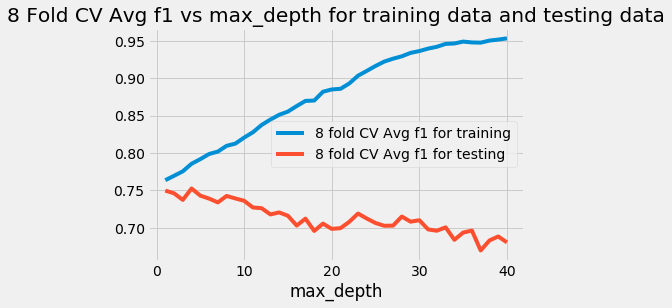

In [84]:
plt.plot(depth, avg_f1_training, label="8 fold CV Avg f1 for training")
plt.plot(depth, avg_f1_testing, label="8 fold CV Avg f1 for testing")
plt.xlabel('max_depth')
plt.title('8 Fold CV Avg f1 vs max_depth for training data and testing data')
plt.legend()
plt.show()

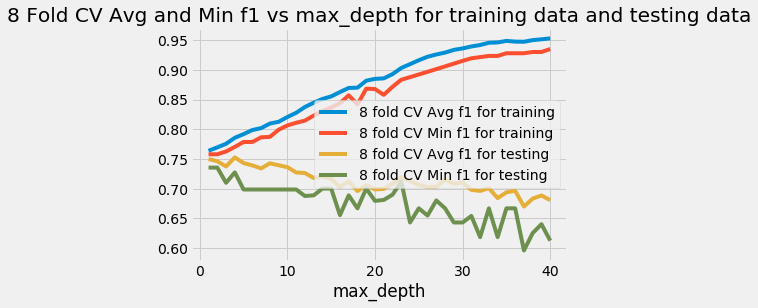

In [85]:
plt.plot(depth, avg_f1_training, label="8 fold CV Avg f1 for training")
plt.plot(depth, min_f1_training, label="8 fold CV Min f1 for training")
plt.plot(depth, avg_f1_testing, label="8 fold CV Avg f1 for testing")
plt.plot(depth, min_f1_testing, label="8 fold CV Min f1 for testing")
plt.xlabel('max_depth')
plt.title('8 Fold CV Avg and Min f1 vs max_depth for training data and testing data')
plt.legend()
plt.show()